In [2]:
import numpy as np
import cv2 as cv
import os

#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage.measure import label, regionprops, regionprops_table

In [2]:
def viewImageInWindow(image, name_of_window):
    cv.namedWindow(name_of_window, cv.WINDOW_NORMAL)
    cv.imshow(name_of_window, image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

def viewImageAndCoordInNotebook(img, coords, bounding=[], subplot="test"):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=3)
    if len(bounding)!=0:
        rect = patches.Rectangle((bounding[0][0], bounding[0][1]), bounding[1], bounding[2], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    

In [3]:
# Фильтрация и бинаризация изображений

In [4]:
# Подготовка тестовых выборок

In [5]:
def load_images_from_folder(folder): 
    images = [] 
    for filename in os.listdir(folder): # читаю все предобратанные картинки с фигурами
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv.cvtColor(img, cv.COLOR_BGR2RGB)) #
    return images

imlist = load_images_from_folder('test_imgs/') # список изображений

In [6]:
def get_fugures_by_image(img):
    threshold = filters.threshold_otsu(img)
    mask = img > threshold
    mask = morphology.remove_small_objects(mask, 10)
    mask = morphology.remove_small_holes(mask, 10)
    labels = measure.label(mask)

    fig = px.imshow(img, binary_string=True)
    fig.update_traces(hoverinfo='skip') # hover is only for label info

    figures = measure.regionprops(labels, img)
    
    return figures

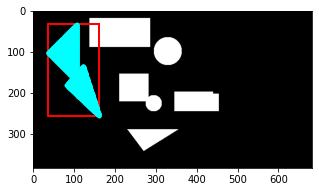

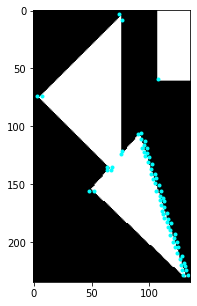

----


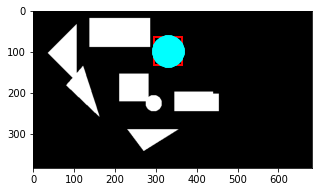

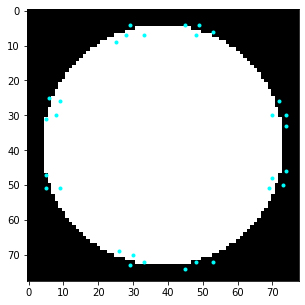

----


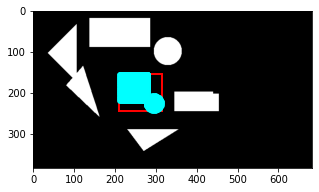

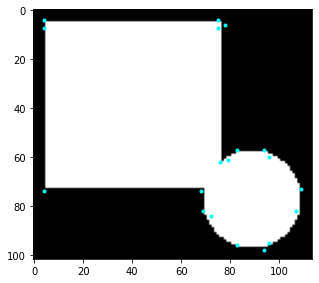

----


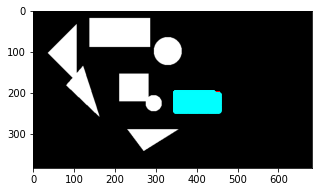

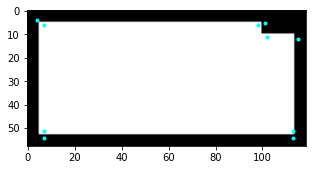

----


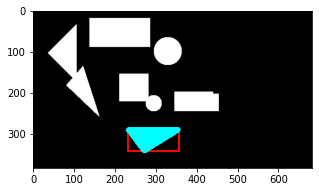

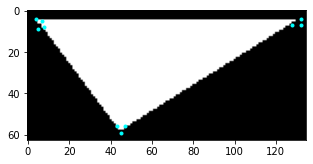

----


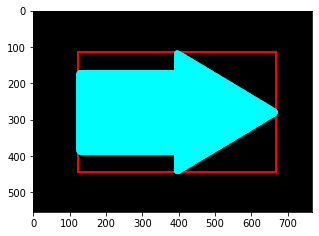

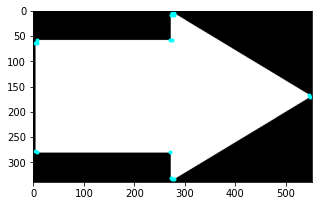

----


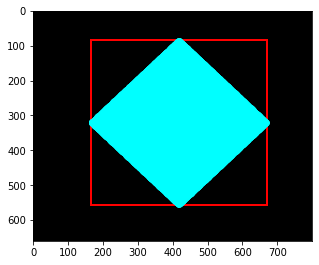

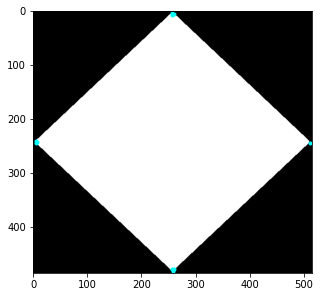

----


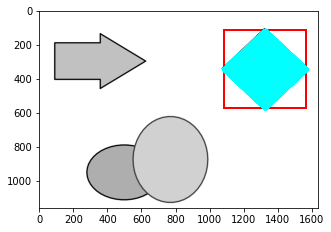

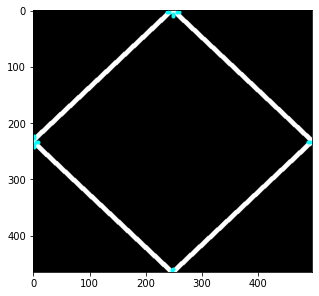

----


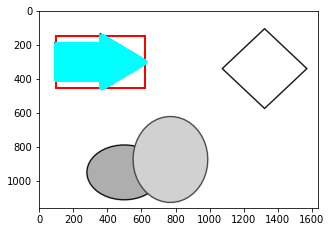

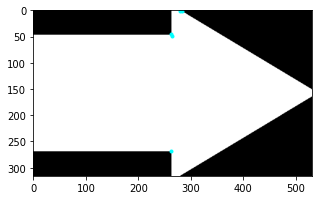

----


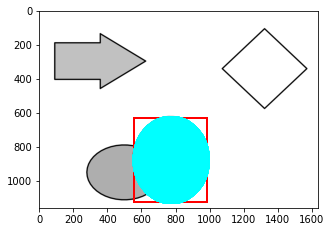

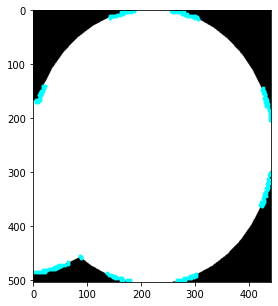

----


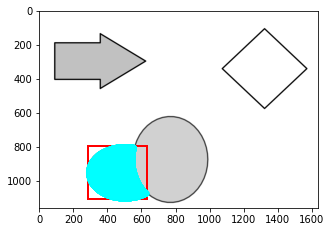

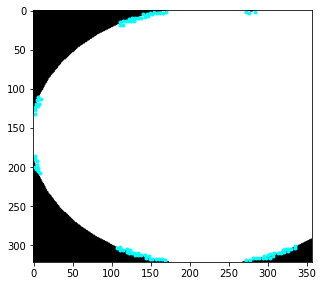

----


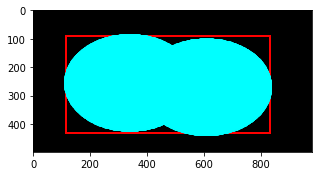

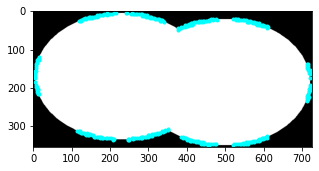

----


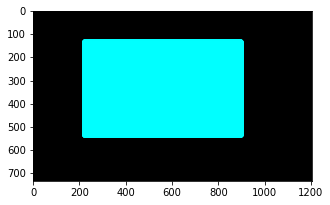

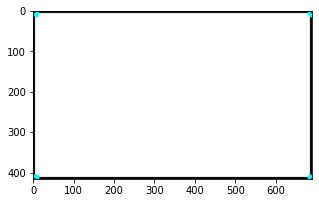

----


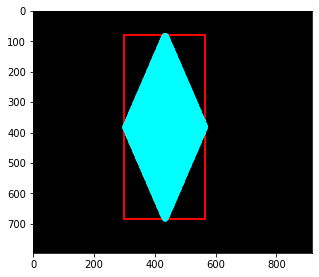

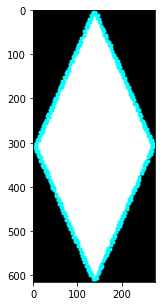

----


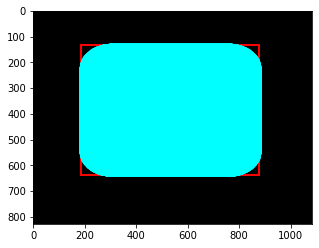

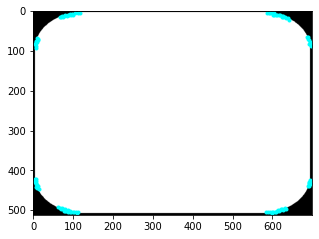

----


In [26]:
# пытаюсь выделить точки границы
all_coords = []
all_bounds = []

# задача подобрать оптимальный шаг и трешхолд
def get_refer_coords(imlist):
    for img in imlist:
        #Убрать в продакшене
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # в серошкальный (почему-то не серошкальный выходит)
        #ret, img = cv.threshold(img, 240 , 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)

        output = img.copy()
        
        figures = get_fugures_by_image(output)
        
        #print(len(figures), len(figures)==1)
        if len(figures)==1:
            ret, img = cv.threshold(img, 240 , 255, cv.CHAIN_APPROX_NONE) # бинаризируем (черно белый)
            figures = get_fugures_by_image(img)
            #print(len(figures))

        if (len(figures)>1):
            figures = figures[1:]
        
        for figure in figures:
            #print(measure.find_contours(figure.coords)[0])
            #print(figure.bbox)
            #print(figure.orientation)
            #print(figure.major_axis_length)
            #print(figure.minor_axis_length)
            
            viewImageAndCoordInNotebook(img, figure.coords, [[figure.bbox[1], figure.bbox[0]], figure.bbox[3]-figure.bbox[1], figure.bbox[2]-figure.bbox[0]])

            test = output.copy()
            test = test[figure.bbox[0]-5:figure.bbox[2]+5, figure.bbox[1]-5:figure.bbox[3]+5]
            ret, test = cv.threshold(test, 240 , 255, cv.CHAIN_APPROX_NONE)
            
            img_float = np.float32(test)
            dst = cv.cornerHarris(img_float,2,3,0.04) # выделяем угловые точки
            dst = cv.dilate(dst,None)
            ret, dst = cv.threshold(dst,0.001*dst.max(),255,0)
            dst = np.uint8(dst)
            #print(dst)

            # min-distance нужно будет подогнать
            
            coords = corner_peaks(dst, min_distance=2, threshold_rel=0.02)
            #print(coords)
            
            if len(coords)!=0:
                #определяю угловые точки
                minX = coords[0][1]
                minY = coords[0][0]
                maxX = coords[0][1]
                maxY = coords[0][0]
                for coord in coords:
                    if coord[1]<minX:
                        minX = coord[1]
                    if coord[0]<minY:
                        minY = coord[0]
                    if coord[1]>maxX:
                        maxX = coord[1]
                    if coord[0]>maxY:
                        maxY = coord[0]
                #bound = [[minX, minY], maxX-minX, maxY-minY]
                #all_bounds.append(bound)
                all_coords.append(coords)
                
                viewImageAndCoordInNotebook(test, coords)
                print("----")
            
    return {"coords":all_coords, "bounds":all_bounds}

# тестовая выборка
result = get_refer_coords(imlist)

In [8]:
# Обучение классификатором

In [9]:
# Bounding найденного

In [10]:
for prop_name in properties:
    print(getattr(figures[0], prop_name),prop_name)
#print(props[0].coords)


NameError: name 'properties' is not defined

In [ ]:
print(len(props))
print(type(cv.cvtColor(imlist[3], cv.COLOR_BGR2GRAY)))
print(type(props[0].coords))